**Capstone 2 Transjakarta**

Created by : Indah Widya Putri

# Latar Belakang


Transjakarta yang dimiliki oleh PT Transportasi Jakarta adalah salah satu transportasi umum di pusat Kota Jakarta yang telah beroperasi sejak tahun 2004. Transjakarta diperuntukkan untuk mendukung mobilitas masyarakat Kota Jakarta. Moda transportasi Transjakarta terdiri dari bus besar (BRT), bus sedang dan besar (non-BRT), serta minibus (Mikrotrans). Untuk menggunakan Transjakarta, para penggunanya harus memiliki kartu pembayaran yang digunakan sebagai tiket. Perusahaan merasa bahwa pemasukan Transjakarta kurang di optimalkan pada koridor-koridor dan halte-halte yang padat, sehingga kurangnya nilai pemasukan yang diterima. Untuk itu perusahaan meminta untuk melakukan analisis terkait hal tersebut agar dapat ditemukan strategi yang sesuai

## Pernyataan Masalah ##

Management dari PT Transportasi Jakarta ingin mengetahui **koridor dan halte Transjakarta yang mana saja yang padat beserta karakter penumpangnya saat hari kerja (weekday)**. Informasi ini dapat membantu perusahaan untuk dapat menentukan strategi penambahan layanan (berbayar) dan promosi pada halte dan koridor yang memiliki jumlah pengguna yang tinggi berdasarkan karakter pengguna

# **Data**

Untuk menjawab pertanyaan di atas, kita akan menganalisa data transaksi Transjakarta yang dimiliki oleh perusahaan. Dataset dapat dilihat di sini

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind 

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait informasi koridor Transjakarta, waktu tap-in dan tap-out, dan identitas pemegang kartu beserta jumlah harga tiket yang dibayar

* transID: Unique transaction id for every transaction
* payCardID: Customers main identifier. The card customers use as a ticket for entrance and exit.
* payCardBank: Customers card bank issuer name
* payCardName: Customers name that is embedded in the card.
* payCardSex: Customers sex that is embedded in the card
* payCardBirthDate: Customers birth year
* corridorID: Corridor ID / Route ID as key for route grouping.
* corridorName: Corridor Name / Route Name contains Start and Finish for each route.
* direction: 0 for Go, 1 for Back. Direction of the route.
* tapInStops: Tap In (entrance) Stops ID for identifying stops name
* tapInStopsName: Tap In (entrance) Stops Name where customers tap in.
* tapInStopsLat: Latitude of Tap In Stops
* tapInStopsLon: Longitude of Tap In Stops
* stopStartSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
* tapInTime: Time of tap in. Date and time
* tapOutStops: Tap Out (Exit) Stops ID for identifying stops name
* tapOutStopsName: Tap out (exit) Stops Name where customers tap out.
* tapOutStopsLat: Latitude of Tap Out Stops
* tapOutStopsLon: Longitude of Tap Out Stops
* stopEndSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
* tapOutTime: Time of tap out. Date and time
* payAmount: The number of what customers pay. Some are free. Some not.


In [3]:
df = pd.read_csv('Transjakarta.csv')
display(df.head(),df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


## Data Understanding and Cleansing

Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan data understanding. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan data cleaning. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara domain knowledge maupun secara statistik.

Pertama, mari kita lihat informasi umur dari dataset Transjakarta

In [4]:
print(f'Jumlah baris dan kolom di dataset Transjakarta adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset Transjakarta adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       356

In [5]:
display(df.describe(), df.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [6]:
pd.set_option('display.max_colwidth', 1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

transjakarta = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
transjakarta

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana,

Berdasarkan data diatas, dapat kita lihat bahwa :

* dataset Transjakarta memiliki 37900 baris dan 22 kolom
* beberapa kolom, yaitu, `corridorID`, `corridorName`, `tapInStops`, `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime`, dan `payAmount` memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.
* kolom `tapInTime` memiliki data object yang seharusnya data di kolom tersebut merupakan data tipe datetime
* kolom yang hanya memiliki data unik kurang dari 10 kategori adalah `payCardBank`, `payCardSex`, `direction`, dan `payAmount`. Sementara untuk sisa kolom yang lain memiliki data unik yang banyak jumlah kategorinya
* kolom `payCardID` berisikan id unik dari kartu pembayaran para pengguna Transjakarta, sehingga kolom ini bisa dihapus saja
* data di kolom `direction`,`tapInStopsLat`,`tapInStopsLon`,dan `stopStartSeq` merupakan data yang tidak relevan sebagai pendukung analisis di permasalahan ini, sehingga kolom-kolom ini bisa dihapus saja

#### Missing Value

In [7]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

In [8]:
df.isna().sum()

transID             0   
payCardID           0   
payCardBank         0   
payCardName         0   
payCardSex          0   
payCardBirthDate    0   
corridorID          1257
corridorName        1930
direction           0   
tapInStops          1213
tapInStopsName      0   
tapInStopsLat       0   
tapInStopsLon       0   
stopStartSeq        0   
tapInTime           0   
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

Secara garis besar:  
* *missing value* di kolom `corridorID` dan `corridorName` memiliki data yang saling berkaitan. Tetapi data kosong di kolom `corridorName` memiliki proporsi data kosong yang cukup tinggi dibandingkan data di kolom `corridorID`. Data di kolom `corridorName` merupakan salah satu data utama yang dibutuhkan untuk analisis ini, sehingga kita perlu menurunkan data kosong pada kolom tersebut
* *missing value* di kolom `tapInStops`, `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime`, dan `payAmount` memiliki persentase data kosong dengan range yang cukup sama direntang 2,65% - 6,03% 

Ada 2 cara untuk menangani *missing value*:
* pertama, menghapus baris/kolom yang berisi *missing value*. Cara ini dapat digunakan karena persentase *missing value* pada kolom-kolom diatas kecil, sehingga menghilangkan baris yang memiliki *missing value* didalamnya tidak banyak memengaruhi keseluruhan analisis
* kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus*. Menghapus data akan menjadi opsi terakhir.

##### corridorID & corridorName

Seperti yang sudah dijelaskan diatas bahwa untuk menangani *missing value* dapat digunakan metode mengisi data yang hilang dengan data yang sama di kolom lainnya.
* untuk mengisi data kosong di kolom `corridorName` kita akan menggunakan acuan kolom lain yang memiliki corridorID yang sama dengan corridorID yang memiliki data kosong di kolom`corridorName` tersebut, tetapi memiliki data yang terisi di kolom `corridorName`
* pengisian *missing value* ini digunakan untuk menurunkan persentase data kosong (NaN) di kolom `corridorName` mengingat bahwa persentase data kosong di `corridorName` cukup tinggi dibandingkan data kosong di kolom `corridorID`

Mencari kolom yang memiliki orridor ID tetapi memiliki missing value di Corridor Name

In [9]:
corrname_missing = df[df['corridorName'].isna()]['corridorID'].value_counts()
corrname_missing


corridorID
6N        12
6C        11
9D        10
JAK.58    9 
JAK.77    9 
         .. 
S12       1 
6A        1 
M8        1 
12B       1 
2Q        1 
Name: count, Length: 203, dtype: int64

Karena datanya terlalu banyak kita mengambil ke corridor ID yang memiliki lebih dari 5 missing value. Dan data tersebut kita bagi ketiga tahap.

1. Mencari corridorID yang memiliki data *missing value* lebih dari 7

In [10]:
corr8 = corrname_missing[corrname_missing>7]
corr8

corridorID
6N        12
6C        11
9D        10
JAK.58    9 
JAK.77    9 
M11       9 
1T        9 
JAK.36    8 
2H        8 
3A        8 
M7B       8 
JAK.29    8 
JAK.72    8 
Name: count, dtype: int64

* Setelah didapatkan corridorID mana saja yang memiliki *missing value* lebih dari 7, kemudian kita mencari nama dari corridorID tersebut dari kolom lainnya yang memiliki corridorID yang sama dan corridorName yang terisi

In [11]:
filtered =  df[df['corridorID'].isin(['6N','6C','9D','JAK.58','JAK.77','M11','1T','JAK.36','2H','3A','M7B','JAK.29','JAK.72'])][['corridorID', 'corridorName']]
b = filtered['corridorName'].unique()

result = pd.DataFrame({
    'corridorID': [filtered[filtered['corridorName'] == name]['corridorID'].iloc[0] for name in b if pd.notna(name)],
    'corridorName': [name for name in b if pd.notna(name)]
})

result

,corridorID,corridorName
0,6C,Stasiun Tebet - Karet via Patra Kuningan
1,1T,Cibubur - Balai Kota
2,M7B,BKN - Blok M
3,6N,Ragunan - Blok M via Kemang
4,M11,Pulo Gebang - Pulo Gadung 2
5,JAK.36,Cilangkap - Cililitan
6,9D,Pasar Minggu - Tanah Abang
7,3A,Rusun Pesakih - Kalideres
8,JAK.77,Tanjung Priok - Jembatan Item
9,2H,Rusun Jati Rawasari - Senen


* Setelah corridorName telah didapatkan, selanjutnya corridorName diisikan ke kolom corridorName yang kosong

In [12]:
for corridor_id, count in corrname_missing.items():
    df.loc[df['corridorID'] == '6C', 'corridorName'] = 'Stasiun Tebet - Karet via Patra Kuningan'
    df.loc[df['corridorID'] == '6N', 'corridorName'] = 'Ragunan - Blok M via Kemang'
    df.loc[df['corridorID'] == '9D', 'corridorName'] = 'Pasar Minggu - Tanah Abang'
    df.loc[df['corridorID'] == 'JAK.58', 'corridorName'] = 'Cilincing - Rorotan'
    df.loc[df['corridorID'] == 'JAK.77', 'corridorName'] = 'Tanjung Priok - Jembatan Item'
    df.loc[df['corridorID'] == 'M11', 'corridorName'] = 'Pulo Gebang - Pulo Gadung 2'
    df.loc[df['corridorID'] == '1T', 'corridorName'] = 'Cibubur - Balai Kota'
    df.loc[df['corridorID'] == 'JAK.36', 'corridorName'] = 'Cilangkap - Cililitan'
    df.loc[df['corridorID'] == '2H', 'corridorName'] = 'Rusun Jati Rawasari - Senen'
    df.loc[df['corridorID'] == '3A', 'corridorName'] = 'Rusun Pesakih - Kalideres'
    df.loc[df['corridorID'] == 'M7B', 'corridorName'] = 'BKN - Blok M'
    df.loc[df['corridorID'] == 'JAK.29', 'corridorName'] = 'Tanjung Priok - Sukapura'
    df.loc[df['corridorID'] == 'JAK.72', 'corridorName'] = 'Kampung Rambutan - Pasar Rebo via Poncol'
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


* Setelah kita isi data kosong tersebut, kita cek kembali data kosong yang masih ada

In [13]:
corupdate = df[df['corridorName'].isna()]['corridorID'].value_counts()
corupdate


corridorID
JAK.17      7
JAK.27      7
JAK.110A    7
JAK.10      7
5F          7
           ..
JAK.52      1
JAK.61      1
JAK.74      1
S12         1
2Q          1
Name: count, Length: 190, dtype: int64

2. Mencari corridorID yang memiliki data *missing value* sebanyak 7 buah data

In [14]:
corr7 = corupdate[corupdate==7]
corr7

corridorID
JAK.17      7
JAK.27      7
JAK.110A    7
JAK.10      7
5F          7
6Q          7
11Q         7
8D          7
JAK.02      7
8K          7
9N          7
JAK.64      7
JAK.43C     7
Name: count, dtype: int64

In [15]:
filter =  df[df['corridorID'].isin(['JAK.17','JAK.27','JAK.110A','JAK.10','5F','6Q','11Q','8D','JAK.02','8K','9N','JAK.64','JAK.43C'])][['corridorID', 'corridorName']]
c = filter['corridorName'].unique()

result = pd.DataFrame({
    'corridorID': [filter[filter['corridorName'] == name]['corridorID'].iloc[0] for name in c if pd.notna(name)],
    'corridorName': [name for name in c if pd.notna(name)]
})

result

,corridorID,corridorName
0,11Q,Kampung Melayu - Pulo Gebang via BKT
1,JAK.02,Kampung Melayu - Duren Sawit
2,9N,Pinang Ranti - Pramuka
3,8K,Batusari - Grogol
4,JAK.43C,Sarana Jaya - Tebet Eco Park (TEP) - Stasiun Cawang
5,JAK.27,Pulo Gebang - Rorotan
6,6Q,Dukuh Atas - Casablanca via Epicentrum Raya
7,JAK.64,Lenteng Agung - Aseli
8,JAK.10,Tanah Abang - Kota
9,5F,Kampung Melayu - Tanah Abang


In [16]:
for corridor_id, count in corupdate.items():
    df.loc[df['corridorID'] == 'JAK.17', 'corridorName'] = 'Senen - Pulo Gadung'
    df.loc[df['corridorID'] == 'JAK.27', 'corridorName'] = 'Pulo Gebang - Rorotan'
    df.loc[df['corridorID'] == 'JAK.110A', 'corridorName'] = 'Rusun Marunda - Terminal Terpadu Pulo Gebang'
    df.loc[df['corridorID'] == 'JAK.10', 'corridorName'] = 'Tanah Abang - Kota'
    df.loc[df['corridorID'] == '5F', 'corridorName'] = 'Kampung Melayu - Tanah Abang'
    df.loc[df['corridorID'] == '6Q', 'corridorName'] = 'Dukuh Atas - Casablanca via Epicentrum Raya'
    df.loc[df['corridorID'] == '11Q', 'corridorName'] = 'Kampung Melayu - Pulo Gebang via BKT'
    df.loc[df['corridorID'] == '8D', 'corridorName'] = 'Joglo - Blok M'
    df.loc[df['corridorID'] == 'JAK.02', 'corridorName'] = 'Kampung Melayu - Duren Sawit'
    df.loc[df['corridorID'] == '8K', 'corridorName'] = 'Batusari - Grogol'
    df.loc[df['corridorID'] == '9N', 'corridorName'] = 'Pinang Ranti - Pramuka'
    df.loc[df['corridorID'] == 'JAK.64', 'corridorName'] = 'Lenteng Agung - Aseli'
    df.loc[df['corridorID'] == 'JAK.43C', 'corridorName'] = 'Sarana Jaya - Tebet Eco Park (TEP) - Stasiun Cawang'
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [17]:
corupdate1 = df[df['corridorName'].isna()]['corridorID'].value_counts()
corupdate1

corridorID
M9        6
B13       6
5C        6
JAK.85    6
9A        6
         ..
11C       1
JAK.61    1
JAK.74    1
S12       1
2Q        1
Name: count, Length: 177, dtype: int64

3. Mencari corridorID yang memiliki data *missing value* sebanyak 6 buah data

In [18]:
corr6 = corupdate1[corupdate1==6]
corr6

corridorID
M9         6
B13        6
5C         6
JAK.85     6
9A         6
11P        6
JAK.49     6
8C         6
2E         6
4B         6
JAK.03     6
JAK.42     6
JAK.32     6
1          6
JAK.40     6
1M         6
12P        6
JAK.120    6
7A         6
JAK.13     6
JAK.22     6
11D        6
Name: count, dtype: int64

In [19]:
filter1 =  df[df['corridorID'].isin(['M9','B13','5C','JAK.85','9A','11P','JAK.49','8C','2E','4B','JAK.03','JAK.42','JAK.32','1','JAK.40','1M','12P','JAK.120','7A','JAK.13','JAK.22','11D'])][['corridorID', 'corridorName']]
d = filter1['corridorName'].unique()

result = pd.DataFrame({
    'corridorID': [filter1[filter1['corridorName'] == name]['corridorID'].iloc[0] for name in d if pd.notna(name)],
    'corridorName': [name for name in d if pd.notna(name)]
})

result

,corridorID,corridorName
0,11D,Pulo Gebang - Pulo Gadung 2 via PIK
1,9A,PGC 2 - Grogol 2
2,M9,Pinang Ranti - Pluit
3,JAK.42,Kampung Melayu - Pondok Kelapa
4,1,Blok M - Kota
5,8C,Kebayoran Lama - Tanah Abang
6,JAK.49,Lebak Bulus - Cipulir
7,7A,Kampung Rambutan - Lebak Bulus
8,1M,Meruya - Blok M
9,5C,PGC - Juanda


In [20]:
for corridor_id, count in corupdate1.items():
    df.loc[df['corridorID'] == 'M9', 'corridorName'] = 'Pinang Ranti - Pluit'
    df.loc[df['corridorID'] == 'B13', 'corridorName'] = 'Bekasi Barat - Blok M'
    df.loc[df['corridorID'] == '5C', 'corridorName'] = 'PGC - Juanda'
    df.loc[df['corridorID'] == 'JAK.85', 'corridorName'] = 'Bintara - Cipinang Indah'
    df.loc[df['corridorID'] == '9A', 'corridorName'] = 'PGC 2 - Grogol 2'
    df.loc[df['corridorID'] == '11P', 'corridorName'] = 'Rusun Pondok Bambu - Walikota Jakarta Timur'
    df.loc[df['corridorID'] == 'JAK.49', 'corridorName'] = 'Lebak Bulus - Cipulir'
    df.loc[df['corridorID'] == '8C', 'corridorName'] = 'Kebayoran Lama - Tanah Abang'
    df.loc[df['corridorID'] == '2E', 'corridorName'] = 'Rusun Rawa Bebek - Kodamar'
    df.loc[df['corridorID'] == '4B', 'corridorName'] = 'Stasiun Manggarai - UI'
    df.loc[df['corridorID'] == 'JAK.03', 'corridorName'] = 'Lebak Bulus - Andara'
    df.loc[df['corridorID'] == 'JAK.42', 'corridorName'] = 'Kampung Melayu - Pondok Kelapa'
    df.loc[df['corridorID'] == 'JAK.32', 'corridorName'] = 'Lebak Bulus - Petukangan'
    df.loc[df['corridorID'] == '1', 'corridorName'] = 'Blok M - Kota'
    df.loc[df['corridorID'] == 'JAK.40', 'corridorName'] = 'Harapan Baru - Pulo Gebang via Rawa Kuning'
    df.loc[df['corridorID'] == '1M', 'corridorName'] = 'Meruya - Blok M'
    df.loc[df['corridorID'] == '12P', 'corridorName'] = 'St. LRT Pegangsaan Dua - JIS'
    df.loc[df['corridorID'] == 'JAK.120', 'corridorName'] = 'JIS - Terminal Muara Angke'
    df.loc[df['corridorID'] == '7A', 'corridorName'] = 'Kampung Rambutan - Lebak Bulus'
    df.loc[df['corridorID'] == 'JAK.13', 'corridorName'] = 'Tanah Abang - Jembatan Lima'
    df.loc[df['corridorID'] == 'JAK.22', 'corridorName'] = 'Dwikora - Penas Kalimalang'
    df.loc[df['corridorID'] == '11D', 'corridorName'] = 'Pulo Gebang - Pulo Gadung 2 via PIK'
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [21]:
corupdate2 = df[df['corridorName'].isna()]['corridorID'].value_counts()
corupdate2

corridorID
5M        5
JAK.44    5
JAK.41    5
8         5
5         5
         ..
7E        1
M8        1
JAK.52    1
JAK.61    1
2Q        1
Name: count, Length: 155, dtype: int64

In [22]:
df.isna().sum()

transID             0   
payCardID           0   
payCardBank         0   
payCardName         0   
payCardSex          0   
payCardBirthDate    0   
corridorID          1257
corridorName        1590
direction           0   
tapInStops          1213
tapInStopsName      0   
tapInStopsLat       0   
tapInStopsLon       0   
stopStartSeq        0   
tapInTime           0   
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [23]:
df[['corridorID','corridorName']].isna().sum()/df.shape[0]*100

corridorID      3.316623
corridorName    4.195251
dtype: float64

Setelah beberapa data *missing value* diisikan, kolom `corridorName` memiliki persentase data kosong yang berkurang, sehingga yang tadinya memiliki *missing value* sebesar 5,09%, saat ini berkurang menjadi 4,19%. Karena persentase *missing value* sudah tidak terlalu besar perbedaannya dengan kolom corridorID, maka *missing value* baik di kolom `corridorID` dan `corridorName` dapat dihapus saja

In [24]:
df.dropna(subset=['corridorID','corridorName'],inplace=True)

In [25]:
df.isna().sum()

transID             0   
payCardID           0   
payCardBank         0   
payCardName         0   
payCardSex          0   
payCardBirthDate    0   
corridorID          0   
corridorName        0   
direction           0   
tapInStops          1152
tapInStopsName      0   
tapInStopsLat       0   
tapInStopsLon       0   
stopStartSeq        0   
tapInTime           0   
tapOutStops         2180
tapOutStopsName     1273
tapOutStopsLat      1273
tapOutStopsLon      1273
stopEndSeq          1273
tapOutTime          1273
payAmount           963 
dtype: int64

##### payAmount

kolom `payAmount` memiliki 3 jenis data 

In [26]:
df['payAmount'].value_counts()

payAmount
3500.0     17637
0.0        15907
20000.0    1671 
Name: count, dtype: int64

In [27]:
df['payAmount'].isna().sum()/df.shape[0]*100

2.6618386864945545

Karena persentase *missing value* yang dimiliki kolom `payAmount` kecil, kita dapat menghapus baris yang memiliki nilai *missing value* didalamnya

In [28]:
df.dropna(subset=['payAmount'],inplace=True)

In [29]:
df.isna().sum()

transID             0   
payCardID           0   
payCardBank         0   
payCardName         0   
payCardSex          0   
payCardBirthDate    0   
corridorID          0   
corridorName        0   
direction           0   
tapInStops          1119
tapInStopsName      0   
tapInStopsLat       0   
tapInStopsLon       0   
stopStartSeq        0   
tapInTime           0   
tapOutStops         2120
tapOutStopsName     1235
tapOutStopsLat      1235
tapOutStopsLon      1235
stopEndSeq          1235
tapOutTime          1235
payAmount           0   
dtype: int64

##### tapInStops dan stopEndSeq

Untuk kolom `tapInStops` dan `stopEndSeq` kita tidak menghapus baris yang memiliki *missing value* karena khawatir dapat memengaruhi pengurangan data yang dapat dianalisis dan kedua kolom ini pun juga tidak dibutuhkan dan tidak memiliki relevansi untuk mendukung proses analisis permasalahan ini. Sehingga, kita lebih baik menghapus kedua kolom tersebut saja

In [30]:
df.drop(columns=['tapInStops','stopEndSeq'],inplace=True)

##### tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, dan tapOutTime

Sama halnya dengan kolom `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, dan `tapOutTime` kita tidak menghapus baris yang memiliki *missing value* karena khawatir dapat memengaruhi pengurangan data yang dapat dianalisis dan kelima kolom ini pun juga tidak dibutuhkan dan tidak memiliki relevansi untuk mendukung proses analisis permasalahan ini. Sehingga, kita lebih baik menghapus kelima kolom tersebut saja

In [31]:
df.drop(columns=['tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','tapOutTime'],inplace=True)

### Data yang tidak relevan

#### payCardID, direction, tapInStopsLat, tapInStopsLon, stopStartSeq

Kolom `payCardID`,`direction`,`tapInStopsLat`,`tapInStopsLon`, dan `stopStartSeq` merupakan kolom yang tidak memiliki *missing value* dan tidak memiliki relevansi dalam mendukung proses data analisis lebih lanjut. Sehingga, kelima kolom ini dapat dihapus saja

In [32]:
df.drop(columns=['payCardID','direction','tapInStopsLat','tapInStopsLon','stopStartSeq'],inplace=True)

## Data yang sudah bersih

Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [33]:
df.isna().sum()

transID             0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
tapInStopsName      0
tapInTime           0
payAmount           0
dtype: int64

In [34]:
listItem = []

for col in df.columns:
    unique_sample_count = min(2, df[col].nunique())
    unique_samples = list(df[col].drop_duplicates().sample(unique_sample_count).values)
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                     df[col].nunique(), unique_samples])

dfDesc = pd.DataFrame(listItem, columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'])
dfDesc

,dataFeatures,dataType,null,unique,uniqueSample
0,transID,object,0,35215,"[VGHV530Y5V28JX, EHKF343D2V15IJ]"
1,payCardBank,object,0,6,"[flazz, bni]"
2,payCardName,object,0,1949,"[KH. Harto Hariyah, M.Farm, Mumpuni Gunarto]"
3,payCardSex,object,0,2,"[F, M]"
4,payCardBirthDate,int64,0,67,"[1989, 1978]"
5,corridorID,object,0,216,"[T21, JAK.64]"
6,corridorName,object,0,211,"[Taman Waduk Papanggo - Kota Tua, Dwikora - Penas Kalimalang]"
7,tapInStopsName,object,0,2529,"[Sbr. Ps. Mandiri Kelapa Gading, Simpang Kali Besar Barat]"
8,tapInTime,object,0,34492,"[2023-04-06 06:56:39, 2023-04-17 09:54:33]"
9,payAmount,float64,0,3,"[0.0, 3500.0]"


In [35]:
df

,transID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,tapInStopsName,tapInTime,payAmount
0,EIIW227B8L34VB,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,Pal Putih,2023-04-03 05:21:44,3500.0
1,LGXO740D2N47GZ,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,Kemenkes 2,2023-04-03 05:42:44,3500.0
2,DJWR385V2U57TO,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,Gg. Kunir II,2023-04-03 05:59:06,3500.0
3,JTUZ800U7C86EH,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Taman Elok 1,2023-04-03 05:44:51,3500.0
4,VMLO535V7F95NJ,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,Sunter Boulevard Barat,2023-04-03 06:17:35,3500.0
...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,Tosari,2023-04-21 18:18:37,3500.0
37896,YHHK837P6Y95GN,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,Garuda Taman Mini,2023-04-18 21:52:31,3500.0
37897,YXPP627N4G95HO,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,Plaza Sentral,2023-04-04 10:29:47,20000.0
37898,RGVK175U2U98UV,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,Museum Textile,2023-04-15 19:59:26,0.0


Sebelum dibersihkan, kita memiliki 37900 baris dan 22 kolom data, sekarang kita memiliki 35215 baris dan 10 kolom. Sekitar 2000 baris data yang kosong dihapus, dan beberapa baris yang memiliki *missing value* diisi dengan data yang relevan.

# Data Analysis

Kita sudah melakukan tahap data cleaning. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu halte dan koridor mana yang memiliki jumlah pengguna yang tinggi.

Analisis akan dilakukan dengan mengidentifikasi terlebih dahulu koridor dan halte yang padat saat *weekday* kemudian diidentifikasi karakter dari pengguna Transjakarta pada saat *weekday* tersebut.

## Berdasarkan tapInTime

Pertama, mari kita identifikasi jumlah transaksi di Transjakarta dengan menggunakan kolom `tapInTime`, sehingga dapat menjawab pertanyaan-pertanyaan ini

1. Bagaimanakah jumlah distribusi transaksi di waktu weekday setiap jamnya?
2. Saat di rentang jam berapa Transjakarta memiliki jumlah transaksi yang tinggi dan rendah?
3. Apakah ada perbedaan yang besar antara jumlah transaksi di jam sibuk dan tidak?

Kolom `tapinTime` diganti menjadi tipe data objek datetime, sehingga data jam di kolom tersebut dapat diextract dan dibuat kolom baru `tapInHour`

In [36]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapInHour'] = df['tapInTime'].dt.hour
df.head()

,transID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,tapInStopsName,tapInTime,payAmount,tapInHour
0,EIIW227B8L34VB,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,Pal Putih,2023-04-03 05:21:44,3500.0,5
1,LGXO740D2N47GZ,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,Kemenkes 2,2023-04-03 05:42:44,3500.0,5
2,DJWR385V2U57TO,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,Gg. Kunir II,2023-04-03 05:59:06,3500.0,5
3,JTUZ800U7C86EH,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Taman Elok 1,2023-04-03 05:44:51,3500.0,5
4,VMLO535V7F95NJ,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,Sunter Boulevard Barat,2023-04-03 06:17:35,3500.0,6


Setelah kolom `tapInTime` diubah tipe datanya, selanjutnya dibuat kolom baru `isWeekend` yang diambil dari data tapInTime yang sudah dikonversi, dengan mengekstrak data weekend menggunakan dt.weekday dengan hari ke-5 (sabtu) dan ke-6 (minggu). Hal ini bertujuan untuk memisahkan data yang ter-record saat weekday dan weekend

In [37]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'])

df['tapInWeekday'] = df['tapInTime'].dt.weekday

df['isWeekend'] = df['tapInWeekday'].isin([5, 6]) 
df

,transID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,tapInStopsName,tapInTime,payAmount,tapInHour,tapInWeekday,isWeekend
0,EIIW227B8L34VB,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,Pal Putih,2023-04-03 05:21:44,3500.0,5,0,False
1,LGXO740D2N47GZ,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,Kemenkes 2,2023-04-03 05:42:44,3500.0,5,0,False
2,DJWR385V2U57TO,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,Gg. Kunir II,2023-04-03 05:59:06,3500.0,5,0,False
3,JTUZ800U7C86EH,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Taman Elok 1,2023-04-03 05:44:51,3500.0,5,0,False
4,VMLO535V7F95NJ,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,Sunter Boulevard Barat,2023-04-03 06:17:35,3500.0,6,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,Tosari,2023-04-21 18:18:37,3500.0,18,4,False
37896,YHHK837P6Y95GN,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,Garuda Taman Mini,2023-04-18 21:52:31,3500.0,21,1,False
37897,YXPP627N4G95HO,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,Plaza Sentral,2023-04-04 10:29:47,20000.0,10,1,False
37898,RGVK175U2U98UV,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,Museum Textile,2023-04-15 19:59:26,0.0,19,5,True


Berdasarkan tabel diatas, apabila sistem tidak mendeteksi data tapInTime ada di hari sabtu dan minggu, pada kolom `isWeekend` akan berisi False

Selanjutnya kita akan membuat variabel baru yang berisikan data transaksi saat *weekday*

In [38]:
busyhourWeekday = df[(df['isWeekend']==False)].groupby(by='tapInHour')[['transID']].count().reset_index()
busyhourWeekday

,tapInHour,transID
0,5,2926
1,6,5236
2,7,2409
3,8,2449
4,9,2406
5,10,95
6,11,128
7,12,110
8,13,119
9,14,9


Berdasarkan tabel diatas kita dapat melihat bahwa terdapat jumlah transaksi yang berbeda jauh antara waktu jam sibuk dan tidak. Untuk membandingkan dengan data jumlah transaksi saat *weekend* kita juga melakukan groupby apabila data di kolom `isWeekend` True

In [39]:
busyhourWeekend = df[(df['isWeekend']==True)].groupby(by='tapInHour')[['transID']].count().reset_index()
busyhourWeekend

,tapInHour,transID
0,5,211
1,6,194
2,7,192
3,8,221
4,9,192
5,10,184
6,11,184
7,12,198
8,13,206
9,14,160


Berdasarkan data diatas dapat kita lihat bahwa jumlah transaksi yang terjadi saat hari sabtu dan minggu di setiap jamnya hampir stabil. Sehingga dapat diidentifikasi bahwa kendala terkait kurang optimalnya pengoperasian Transjakarta dapat difokuskan langsung ke *weekday* karena jumlah transaksi yang banyak di jam-jam tertentu.

Untuk dapat memvisualkan jumlah transaksi Transjakarta setiap jamnya di saat *weekday*, selanjutnya kita buat bar chart berikut

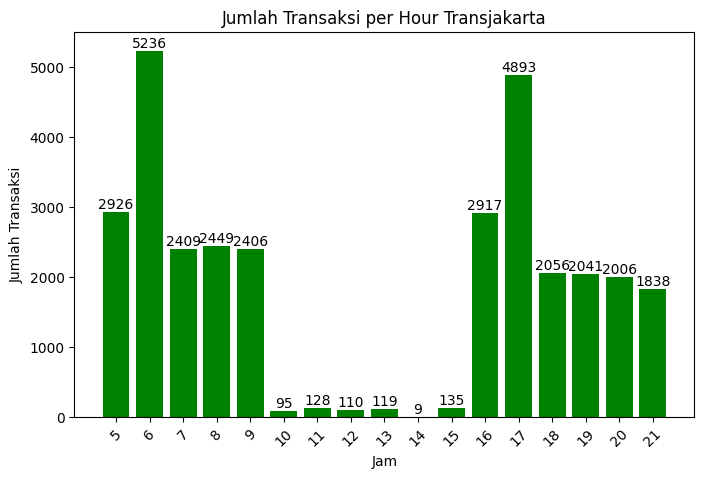

In [40]:
plt.figure(figsize=(8,5))
bars = plt.bar(busyhourWeekday['tapInHour'],busyhourWeekday['transID'],color='green')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.title('Jumlah Transaksi per Hour Transjakarta')
plt.xlabel('Jam')
plt.xticks(np.arange(5,22,1),rotation=45)
plt.ylabel('Jumlah Transaksi')
plt.show()

Berdasarkan diagram dapat terlihat bahwa jumlah transaksi tinggi terdapat di rentang jam 05.00 - 09.00 dan 16.00 - 21.00.

Agar analisis lebih mengerucut, kita dapat mengidentifikasi koridor mana saja yang memiliki jumlah transaksi yang tinggi dan koridor yang memiliki jumlah transaksi yang lebih rendah di rentang jam tersebut

## Berdasarkan transID dan corridorID

Berikutnya, kita dapat melihat fitur `transID` dan `corridorID` untuk mengidentifikasi koridor yang padat. Dengan mengetahui ini, kita bisa menjawab pertanyaan-pertanyaan ini
1. Koridor mana saja yang memiliki transaksi tertinggi dan terendah di jam 05.00-09.00
2. Koridor mana saja yang memiliki transaksi tertinggi dan terendah di jam 16.00-21.00

In [41]:
#identifikasi data transaksi Transjakarta di jam 05.00 - 09.00
dfBusyHourWeekday2 = df[(df['isWeekend']==False)][(df['tapInHour']>=5)&(df['tapInHour']<=9)]
dfBusyHourWeekday2.head()

,transID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,tapInStopsName,tapInTime,payAmount,tapInHour,tapInWeekday,isWeekend
0,EIIW227B8L34VB,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,Pal Putih,2023-04-03 05:21:44,3500.0,5,0,False
1,LGXO740D2N47GZ,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,Kemenkes 2,2023-04-03 05:42:44,3500.0,5,0,False
2,DJWR385V2U57TO,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,Gg. Kunir II,2023-04-03 05:59:06,3500.0,5,0,False
3,JTUZ800U7C86EH,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Taman Elok 1,2023-04-03 05:44:51,3500.0,5,0,False
4,VMLO535V7F95NJ,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,Sunter Boulevard Barat,2023-04-03 06:17:35,3500.0,6,0,False


Untuk mengetahui banyaknya transaksi yang ada di suatu koridor, kita identifikasi dengan melakukan groupby kolom `corridorID` dengan `transID`

In [42]:
transPerCorridorWeekday2 = dfBusyHourWeekday2.groupby(by='corridorID')[['transID']].count().reset_index()
transPerCorridorWeekday2

,corridorID,transID
0,1,112
1,10,39
2,10A,60
3,10B,60
4,10D,78
...,...,...
209,S21,177
210,S22,61
211,S31,60
212,T11,123


In [43]:
#mencari rata-rata jumlah transaksi dari koridor diatas
meanWeekday2 = transPerCorridorWeekday2['transID'].mean()
meanWeekday2

72.08411214953271

Karena datanya terlalu banyak, kita dapat fokuskan ke 20 koridor teratas yang memiliki jumlah transaksi yang tinggi

In [120]:
transPerCorridorX2 = transPerCorridorWeekday2.sort_values(by='transID',ascending=False).head(20)
transPerCorridorX2

,corridorID,transID
40,1T,196
209,S21,177
91,8C,162
14,11P,158
118,JAK.06,156
192,JIS3,155
44,2E,142
181,JAK.72,142
99,9D,139
15,11Q,139


Kemudian dari tabel diatas kita visualisasikan ke bentuk bar chart dibawah

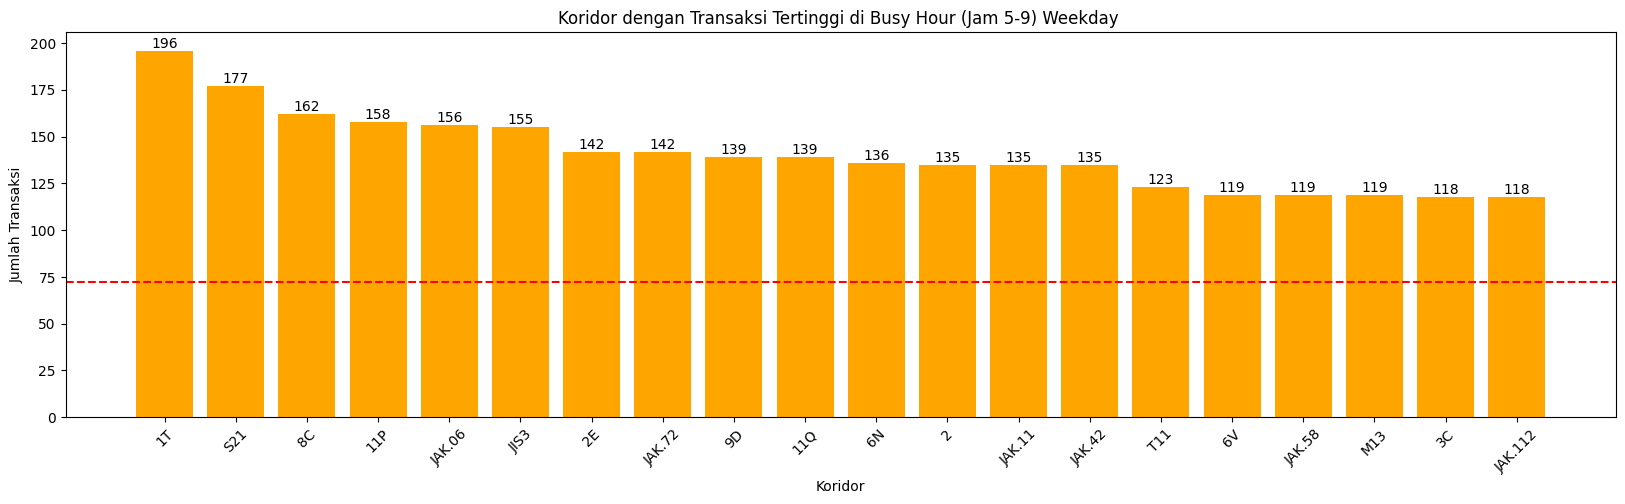

In [121]:
plt.figure(figsize=(20,5))
bars = plt.bar(transPerCorridorX2['corridorID'],transPerCorridorX2['transID'],color='orange')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.axhline(y=meanWeekday2, color='r', linestyle='--')
plt.title('Koridor dengan Transaksi Tertinggi di Busy Hour (Jam 5-9) Weekday ')
plt.xlabel('Koridor')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Transaksi')
plt.show()

Berdasarkan bar chart diatas diketahui 20 koridor yang memiliki jumlah transaksi tertinggi di jam 5-9 pagi saat weekday. Kelima puluh koridor ini memiliki jumlah transaksi yang jauh diatas rata-rata jumlah transaksi secara umum di rentang jam tersebut.
* Secara proporsi, hanya beberapa koridor saja yang memiliki jumlah transaksi yang lebih tinggi dibandingkan yang lain, yaitu koridor 1T, S21, 8C, 11P, JAK.06, dan JIS 3 direntang jumlah transaksi 200-150 
* Terdapat delapan koridor yang memiliki jumlah transaksi tinggi di rentang 145-130
* Sementara untuk koridor sisanya memiliki jumlah transaksi di rentang 125-95

Karena seperti hasil analisis diatas bahwa tidak hanya di jam 5-9 pagi saja yang mengalami kenaikan jumlah transaksi, tetapi kenaikan tersebut juga terjadi di jam 16.00-21.00. Maka kita cari juga koridor mana saja yang memiliki jumlah transaksi yang tinggi

In [46]:
#identifikasi data transaksi Transjakarta di jam 16.00 - 21.00
dfBusyHourWeekday = df[(df['isWeekend']==False)][(df['tapInHour']>=16)&(df['tapInHour']<=21)]
dfBusyHourWeekday.head()

,transID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,tapInStopsName,tapInTime,payAmount,tapInHour,tapInWeekday,isWeekend
300,FGIY576J9K96QI,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,Budi Utomo,2023-04-03 17:53:29,3500.0,17,0,False
301,CAYG359Y2E26NZ,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,Sawo Kecik Raya,2023-04-03 17:35:45,3500.0,17,0,False
302,OYSZ254V7M55NZ,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,Mayang Permai,2023-04-03 17:36:54,3500.0,17,0,False
303,CVQP795Z3T34CY,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Pool Taksi,2023-04-03 17:29:04,3500.0,17,0,False
304,UCXG771V8L71ZT,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,Sunter Kelapa Gading Arah Utara,2023-04-03 16:37:53,3500.0,16,0,False


In [47]:
transPerCorridorWeekday = dfBusyHourWeekday.groupby(by='corridorID')[['transID']].count().reset_index()
transPerCorridorWeekday

,corridorID,transID
0,1,116
1,10,38
2,10A,57
3,10B,61
4,10D,78
...,...,...
209,S21,179
210,S22,55
211,S31,64
212,T11,115


In [48]:
#rata rata jumlah transaksi di jam 16.00-21.00
meanWeekday = transPerCorridorWeekday['transID'].mean()
meanWeekday

73.60280373831776

In [122]:
transPerCorridorX = transPerCorridorWeekday.sort_values(by='transID',ascending=False).head(20)
transPerCorridorX

,corridorID,transID
40,1T,194
209,S21,179
118,JAK.06,160
91,8C,159
192,JIS3,157
14,11P,157
44,2E,148
15,11Q,142
75,6N,142
181,JAK.72,141


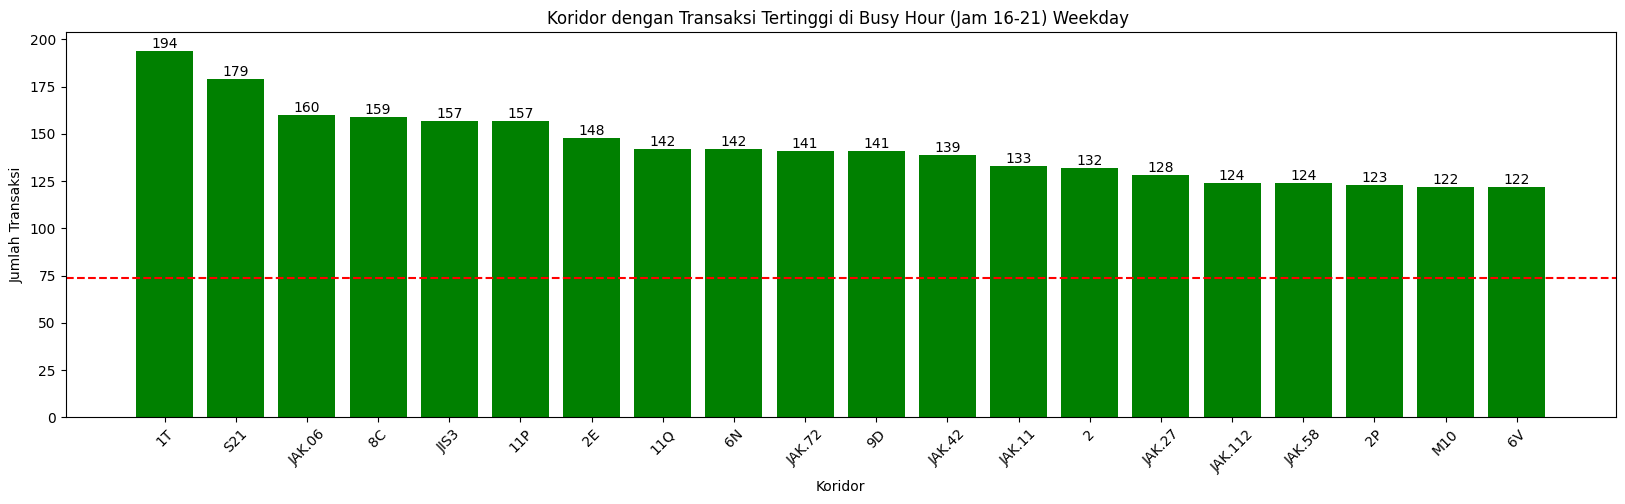

In [123]:
plt.figure(figsize=(20,5))
bars = plt.bar(transPerCorridorX['corridorID'],transPerCorridorX['transID'],color='green')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.axhline(y=meanWeekday, color='r', linestyle='--')
plt.title('Koridor dengan Transaksi Tertinggi di Busy Hour (Jam 16-21) Weekday ')
plt.xlabel('Koridor')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Transaksi')
plt.show()

Berdasarkan bar chart diatas diketahui 20 koridor yang memiliki jumlah transaksi tertinggi di jam 16-21 saat weekday. Kelima puluh koridor ini memiliki jumlah transaksi yang jauh diatas rata-rata jumlah transaksi secara umum di rentang jam tersebut.
* Secara sebaran, terdapat hanya beberapa koridor saja yang memiliki jumlah transaksi yang lebih tinggi dibandingkan yang lain, yaitu koridor 1T, S21, JAK.06, 8C, JIS3, dan 11P direntang jumlah transaksi 200-155
* Terdapat enam koridor yang memiliki jumlah transaksi tinggi di rentang 150-140
* Sementara untuk koridor sisanya memiliki jumlah transaksi di rentang 133 hingga yang paling kecil di 90 jumlah transaksi

Apabila dibandingkan di jam 5-9 pagi, tidak terdapat adanya perbedaan koridor yang memiliki jumlah transaksi di rentang tertinggi. Oleh karena itu, dapat dikatakan bahwa koridor-koridor yang memang padat (jumlah transaksi tinggi) di jam pagi kemungkinan akan juga padat di jam 16-21


## Berdasarkan payAmount

Berikutnya, kita dapat menggunakan fitur `payAmount` untuk memisahkan jenis layanan berdasarkan nominal pembayaran yang dilakukan oleh pengguna Transjakarta, karena Transjakarta sendiri terdiri dari 3 layanan, yaitu Mikrotrans, Transjakarta, dan Royaltrans

In [79]:
#membuat kolom jenisLayanan yang diisikan berdasarkan jumlah payAmount yang dibayarkan
def kategori_pembayaran(payAmount):
    if payAmount == 0:
        return 'Mikrotrans'
    elif payAmount == 3500:
        return 'Transjakarta'
    elif payAmount == 20000:
        return 'Royaltrans'
    else:
        return 'Kategori lainnya'
    
df['jenisLayanan'] = df['payAmount'].apply(kategori_pembayaran)
df.head()

,transID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,tapInStopsName,tapInTime,payAmount,tapInHour,tapInWeekday,isWeekend,jenisLayanan,tahunNow,age
0,EIIW227B8L34VB,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,Pal Putih,2023-04-03 05:21:44,3500.0,5,0,False,Transjakarta,2023,15
1,LGXO740D2N47GZ,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,Kemenkes 2,2023-04-03 05:42:44,3500.0,5,0,False,Transjakarta,2023,26
2,DJWR385V2U57TO,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,Gg. Kunir II,2023-04-03 05:59:06,3500.0,5,0,False,Transjakarta,2023,31
3,JTUZ800U7C86EH,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Taman Elok 1,2023-04-03 05:44:51,3500.0,5,0,False,Transjakarta,2023,45
4,VMLO535V7F95NJ,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,Sunter Boulevard Barat,2023-04-03 06:17:35,3500.0,6,0,False,Transjakarta,2023,41


Kita telah menambahkan kolom baru `jenisLayanan` yang nantinya akan digunakan untuk mendukung analisis untuk menemukan halte mana saja yang dapat dimanfaatkan untuk meningkatkan pendapatan

## Berdasarkan tapInStopsName

Selain koridor yang padat, kita juga akan mengidentifikasi halte Transjakarta mana saja yang padat saat *weekday*. Halte Transjakarta yang akan kita ambil hanya yang memiliki jenisLayanan Transjakarta dan Royaltrans karena halte untuk jenisLayanan Mikrotrans merupakan halte yang tidak memiliki bangunan luas dan memadai, sehingga sulit dimanfaatkan untuk peningkatan pemasukan. 

1. Halte Transjakarta dan Royaltrans mana saja yang memiliki jumlah penumpang yang tinggi?

Dengan dapat menjawab pertanyaan-pertanyaan berikut, kita dapat mengetahui halte-halte yang memiliki *traffic* pengguna yang tinggi sehingga dapat dimanfaatkan untuk kerja sama dengan *tenant*

In [83]:
#membedakan data df yang memiliki jenisLayanan Transjakarta dan Royaltrans
dfHalte = df[(df['jenisLayanan'] == 'Transjakarta')|(df['jenisLayanan'] == 'Royaltrans')]
dfHalte

,transID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,tapInStopsName,tapInTime,payAmount,tapInHour,tapInWeekday,isWeekend,jenisLayanan,tahunNow,age
0,EIIW227B8L34VB,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,Pal Putih,2023-04-03 05:21:44,3500.0,5,0,False,Transjakarta,2023,15
1,LGXO740D2N47GZ,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,Kemenkes 2,2023-04-03 05:42:44,3500.0,5,0,False,Transjakarta,2023,26
2,DJWR385V2U57TO,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,Gg. Kunir II,2023-04-03 05:59:06,3500.0,5,0,False,Transjakarta,2023,31
3,JTUZ800U7C86EH,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Taman Elok 1,2023-04-03 05:44:51,3500.0,5,0,False,Transjakarta,2023,45
4,VMLO535V7F95NJ,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,Sunter Boulevard Barat,2023-04-03 06:17:35,3500.0,6,0,False,Transjakarta,2023,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37888,KWQA944F9O89IN,dki,Hardana Gunarto,F,1982,B14,Bekasi Barat - Kuningan,GOR Sumantri 2,2023-04-05 09:30:00,20000.0,9,2,False,Royaltrans,2023,41
37895,ZWEC949B8Q87QG,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,Tosari,2023-04-21 18:18:37,3500.0,18,4,False,Transjakarta,2023,19
37896,YHHK837P6Y95GN,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,Garuda Taman Mini,2023-04-18 21:52:31,3500.0,21,1,False,Transjakarta,2023,49
37897,YXPP627N4G95HO,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,Plaza Sentral,2023-04-04 10:29:47,20000.0,10,1,False,Royaltrans,2023,47


In [84]:
#data dipisahkan hanya data di waktu weekday
dfweekdayhalte = dfHalte[(dfHalte['isWeekend']==False)]
dfweekdayhalte.head()

,transID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,tapInStopsName,tapInTime,payAmount,tapInHour,tapInWeekday,isWeekend,jenisLayanan,tahunNow,age
0,EIIW227B8L34VB,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,Pal Putih,2023-04-03 05:21:44,3500.0,5,0,False,Transjakarta,2023,15
1,LGXO740D2N47GZ,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,Kemenkes 2,2023-04-03 05:42:44,3500.0,5,0,False,Transjakarta,2023,26
2,DJWR385V2U57TO,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,Gg. Kunir II,2023-04-03 05:59:06,3500.0,5,0,False,Transjakarta,2023,31
3,JTUZ800U7C86EH,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Taman Elok 1,2023-04-03 05:44:51,3500.0,5,0,False,Transjakarta,2023,45
4,VMLO535V7F95NJ,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,Sunter Boulevard Barat,2023-04-03 06:17:35,3500.0,6,0,False,Transjakarta,2023,41


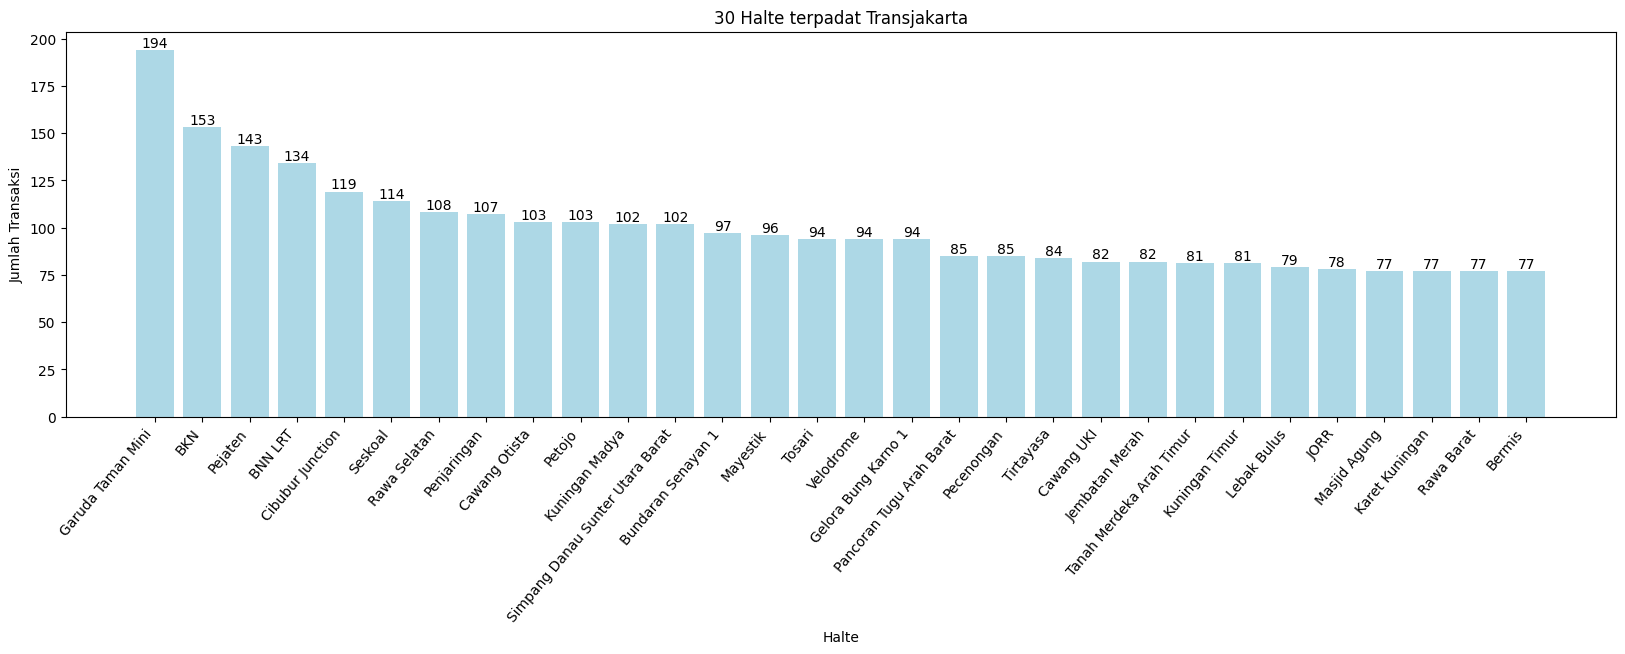

In [124]:
#menggrupkan kolom tapInStopsName sebagai halte dibandingkan dengan banyaknya jumlah transID
haltePadat = dfweekdayhalte.groupby(by='tapInStopsName')[['transID']].count().reset_index()
haltePadat = haltePadat.sort_values(by='transID',ascending=False).head(30)
haltePadat.head()

#memvisiualisasikan tabel tersebut ke dalam bar graph
plt.figure(figsize=(20,5))
bars = plt.bar(haltePadat['tapInStopsName'],haltePadat['transID'],color='#ADD8E6')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.title('30 Halte terpadat Transjakarta')
plt.xlabel('Halte')
plt.xticks(rotation=50,ha='right')
plt.ylabel('Jumlah Transaksi')
plt.show()

Bar graph diatas menunjukkan 30 halte terpadat saat *weekday* dimana halte yang paling padat adalah halte Garuda Taman Mini. Disusul dengan halte BKN, Pejaten, dan BNN LRT yang masing-masing memiliki perbedaan di range 10 transaksi. Dengan ditemukannya ketigapuluh halte ini dapat digunakan untuk strategi pemanfaatan keberadaan halte untuk kerjasama pembukaan *tenant*

## Berdasarkan payCardName, payCardBank

Analisis ini dilakukan dengan mengandalkan fitur `payCardName` dan `payCardBank` untuk mengetahui karakter pengguna Transjakarta dari penggunaan kartu pembayaran yang dipakai. Kita dapat menjawab pertanyaan ini:
1. Bagaimana sebaran pengguna dari masing-masing jenis kartu berdasarkan banyaknya jumlah transaksi?
2. Kartu jenis apa yang digunakan paling banyak oleh pengguna masing-masing jenis layanan Transjakarta?

Informasi ini diperlukan untuk mengidentifikasi pengguna Transjakarta cenderung lebih banyak memiliki kartu jenis apa, sehingga kita dapat menentukan strategi kerjasama yang pas dengan jenis kartu pembayaran tersebut


In [55]:
#memisahkan data df hanya saat weekday
dfkartu = df[(df['isWeekend']==False)]
dfkartu.head()

,transID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,tapInStopsName,tapInTime,payAmount,tapInHour,tapInWeekday,isWeekend,jenisLayanan
0,EIIW227B8L34VB,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,Pal Putih,2023-04-03 05:21:44,3500.0,5,0,False,Transjakarta
1,LGXO740D2N47GZ,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,Kemenkes 2,2023-04-03 05:42:44,3500.0,5,0,False,Transjakarta
2,DJWR385V2U57TO,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,Gg. Kunir II,2023-04-03 05:59:06,3500.0,5,0,False,Transjakarta
3,JTUZ800U7C86EH,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Taman Elok 1,2023-04-03 05:44:51,3500.0,5,0,False,Transjakarta
4,VMLO535V7F95NJ,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,Sunter Boulevard Barat,2023-04-03 06:17:35,3500.0,6,0,False,Transjakarta


In [86]:
#menggrupkan payCardBank dengan rata-rata total transaksi
bank = dfkartu.groupby('payCardBank')[['transID']].count().reset_index()
name = dfkartu.groupby(['payCardName','payCardBank'])[['payAmount']].sum().reset_index()
meanBank = name.groupby('payCardBank')[['payAmount']].mean().reset_index()
meanBank

,payCardBank,payAmount
0,bni,69845.679012
1,brizzi,111500.000000
2,dki,65556.876061
3,emoney,84245.327103
4,flazz,78773.684211
5,online,68396.551724


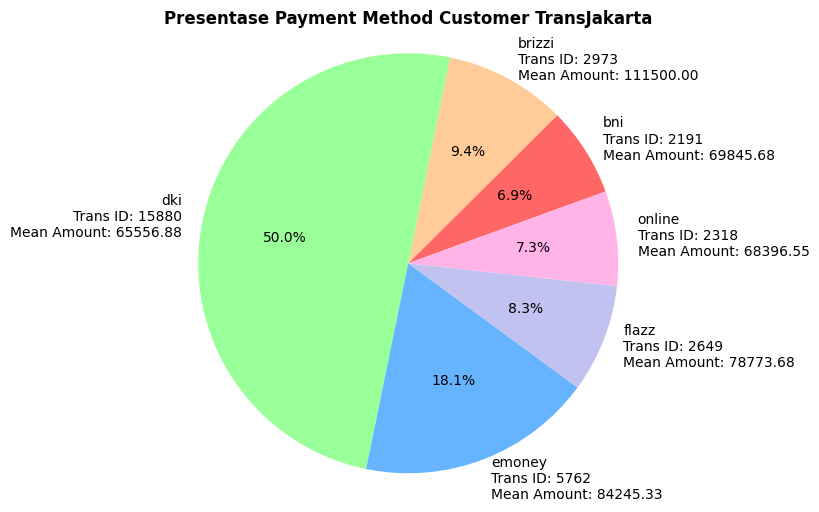

In [87]:
#mengubah data tabel diatas menjadi pie chart dengan keterangan jumlah transaksi setiap kartunya
bank['meanAmount'] = meanBank['payAmount']
total_trans1 = bank['transID'].sum()

bank['percentage'] = bank['transID'] / total_trans1 * 100

plt.figure(figsize=(8, 6))
colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff', '#c2c2f0', '#ffb3e6']
labels = [f"{bank}\nTrans ID: {trans}\nMean Amount: {mean:.2f}" for bank, trans, mean in zip(bank['payCardBank'], bank['transID'], bank['meanAmount'])]
sizes = bank['percentage']

plt.pie(sizes, labels=labels, autopct=lambda p: '{:.1f}%'.format(p),colors=colors, startangle=20)
plt.axis('equal')
plt.title('Presentase Payment Method Customer TransJakarta',fontweight='bold')
plt.show()

Berdasarkan pie chart diatas dapat dilihat terdapat lima jenis kartu pembayaran yang digunakan, sebagai berikut:
* Kartu pembayaran jenis dki adalah jenis kartu pembayaran yang paling banyak digunakan dengan tarnsaski sebanyak 15880
* Kartu pembayaran emoney merupakan kartu kedua yang banyak digunakan dengan transaksi sebanyak 5762 transaksi
* Kartu brizzi, flazz, online, bni merupakan kartu terbanyak setelahnya dengan proporsi yang tidak jauh beda antar satu sama lain dengan proporsi dibawah 3000 transaksi

Kita juga akan coba menganalisis sebaran jenis kartu untuk setiap jenisLayanan

In [59]:
#memisahkan data hanya untuk layanan Transjakarta
dfTransjakarta = dfkartu[(dfkartu['jenisLayanan']=='Transjakarta')]
bankTrans = dfTransjakarta.groupby('payCardBank')[['transID']].count().reset_index()
nameTrans = dfTransjakarta.groupby(['payCardName','payCardBank'])[['payAmount']].sum().reset_index()
meanBankTrans = nameTrans.groupby('payCardBank')[['payAmount']].mean().reset_index()
meanBankTrans

,payCardBank,payAmount
0,bni,97083.333333
1,brizzi,107428.571429
2,dki,93637.323944
3,emoney,99144.859813
4,flazz,96612.068966
5,online,98662.162162


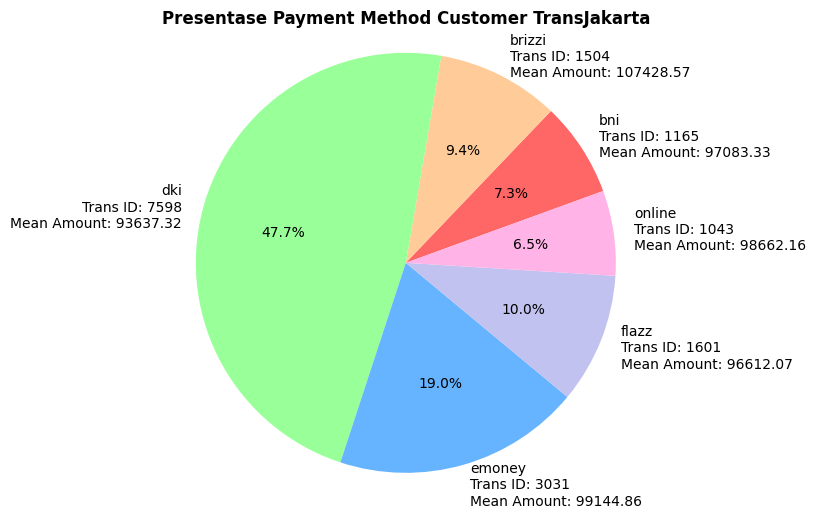

In [60]:
#Memvisualisasikan tabel diatas ke dalam pie chart
bankTrans['meanAmount'] = meanBankTrans['payAmount']
total_trans1 = bankTrans['transID'].sum()

bankTrans['percentage'] = bankTrans['transID'] / total_trans1 * 100

plt.figure(figsize=(8, 6))
colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff', '#c2c2f0', '#ffb3e6']
labels = [f"{bank}\nTrans ID: {trans}\nMean Amount: {mean:.2f}" for bank, trans, mean in zip(bankTrans['payCardBank'], bankTrans['transID'], bankTrans['meanAmount'])]
sizes = bankTrans['percentage']

plt.pie(sizes, labels=labels, autopct=lambda p: '{:.1f}%'.format(p),colors=colors, startangle=20)
plt.axis('equal')
plt.title('Presentase Payment Method Customer TransJakarta',fontweight='bold')
plt.show()

Dari *pie chart* di atas dapat terlihat bahwa pengguna kartu dki masih yang tertinggi sebanyak 47,7% dengan disusul dengan penumpang pengguna emoney  sebanyak 19%

In [61]:
#memisahkan data hanya untuk layanan Royaltrans
dfRoyaltrans = dfkartu[(dfkartu['jenisLayanan']=='Royaltrans')]
bankRoyal = dfRoyaltrans.groupby('payCardBank')[['transID']].count().reset_index()
nameRoyal = dfRoyaltrans.groupby(['payCardName','payCardBank'])[['payAmount']].sum().reset_index()
meanBankRoyal = nameRoyal.groupby('payCardBank')[['payAmount']].mean().reset_index()
meanBankRoyal

,payCardBank,payAmount
0,bni,395000.000000
1,brizzi,680000.000000
2,dki,522608.695652
3,emoney,530000.000000
4,flazz,470000.000000
5,online,575000.000000


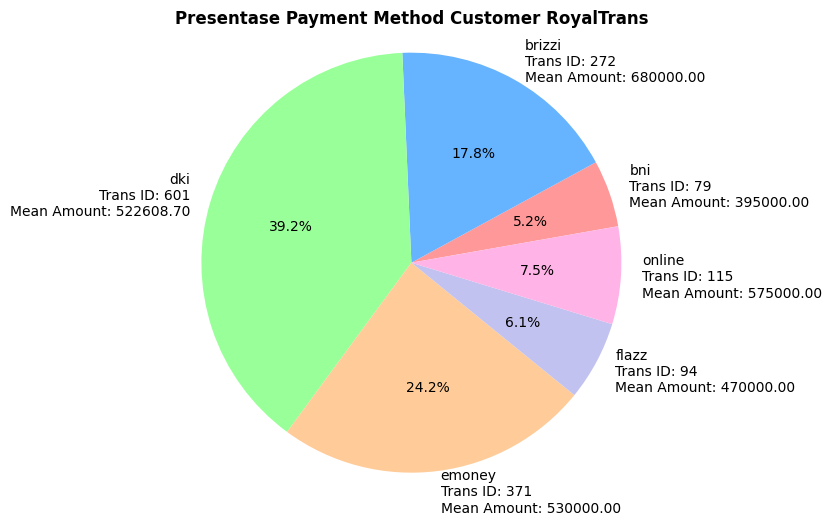

In [62]:
#Memvisualisasikan tabel diatas ke dalam pie chart
bankRoyal['meanAmount'] = meanBankRoyal['payAmount']
total_trans3 = bankRoyal['transID'].sum()

bankRoyal['percentage'] = bankRoyal['transID'] / total_trans3 * 100

plt.figure(figsize=(8, 6))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']
labels = [f"{bank}\nTrans ID: {trans}\nMean Amount: {mean:.2f}" for bank, trans, mean in zip(bankRoyal['payCardBank'], bankRoyal['transID'], bankRoyal['meanAmount'])]
sizes = bankRoyal['percentage']

plt.pie(sizes, labels=labels, autopct=lambda p: '{:.1f}%'.format(p),colors=colors, startangle=10)
plt.axis('equal')
plt.title('Presentase Payment Method Customer RoyalTrans',fontweight='bold')
plt.show()

Berdasarkan *pie chart* diatas dapat terlihat bahwa kartu dki dan emoney cenderung lebih digunakan oleh penumpang Royaltrans daripada jenis kartu lainnya

In [63]:
#memisahkan data hanya untuk layanan Mikrotrans
dfMikrotrans = dfkartu[(dfkartu['jenisLayanan']=='Mikrotrans')]
bankMikro = dfMikrotrans.groupby('payCardBank')[['transID']].count().reset_index()
nameMikro = dfMikrotrans.groupby(['payCardName','payCardBank'])[['payAmount']].sum().reset_index()
meanBankMikro = nameMikro.groupby('payCardBank')[['payAmount']].mean().reset_index()
meanBankMikro

,payCardBank,payAmount
0,bni,0.0
1,brizzi,0.0
2,dki,0.0
3,emoney,0.0
4,flazz,0.0
5,online,0.0


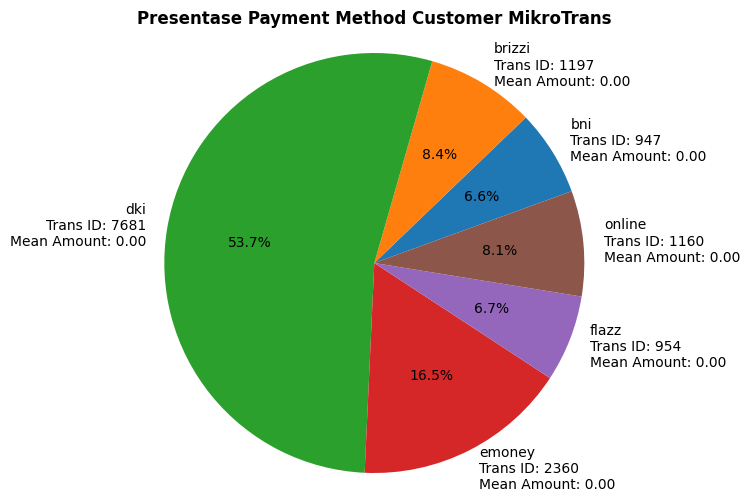

In [64]:
#Memvisualisasikan tabel diatas ke dalam pie chart
bankMikro['meanAmount'] = meanBankMikro['payAmount']
total_trans2 = bankMikro['transID'].sum()

bankMikro['percentage'] = bankMikro['transID'] / total_trans2 * 100

plt.figure(figsize=(8, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
labels = [f"{bank}\nTrans ID: {trans}\nMean Amount: {mean:.2f}" for bank, trans, mean in zip(bankMikro['payCardBank'], bankMikro['transID'], bankMikro['meanAmount'])]
sizes = bankMikro['percentage']

plt.pie(sizes, labels=labels, autopct=lambda p: '{:.1f}%'.format(p),colors=colors, startangle=20)
plt.axis('equal')
plt.title('Presentase Payment Method Customer MikroTrans',fontweight='bold')
plt.show()

Penumpang Mikrotrans berdasarkan pie chart diatas lebih banyak menggunakan kartu dki daripada jenis kartu lainnya

## Berdasarkan payCardSex

Selain dari jenis kartu yang digunakan, kita juga menganalisis *gender* dari penumpang Transjakarta dengan menganalisis `payCardSex` dari masing-masing kartu pembayaran. Kita dapat menjawab pertanyaan ini

1. Apakah ada perbedaan jumlah pembayaran antara penumpang wanita dan pria saat penggunaan Transjakarta?
2. Jenis kelamin apa yang memiliki jumlah transaksi lebih banyak sehingga berkontribusi besar terhadap jumlah pembayaran keduanya?
3. Bagaimana sebaran pengumpang wanita dan pria di koridor Transjakarta terpadat?

Informasi ini digunakan untuk dapat mengetahui karakter penumpang berdasarkan sebaran jenis kelamin, sehingga dapat ditentukan strategi promosi yang sesuai dengan kebutuhan penumpang


In [90]:
#pisahkan data hanya yang berada saat weekday
dfweekday = df[(df['isWeekend']==False)]
dfweekday.head()

,transID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,tapInStopsName,tapInTime,payAmount,tapInHour,tapInWeekday,isWeekend,jenisLayanan,tahunNow,age
0,EIIW227B8L34VB,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,Pal Putih,2023-04-03 05:21:44,3500.0,5,0,False,Transjakarta,2023,15
1,LGXO740D2N47GZ,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,Kemenkes 2,2023-04-03 05:42:44,3500.0,5,0,False,Transjakarta,2023,26
2,DJWR385V2U57TO,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,Gg. Kunir II,2023-04-03 05:59:06,3500.0,5,0,False,Transjakarta,2023,31
3,JTUZ800U7C86EH,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Taman Elok 1,2023-04-03 05:44:51,3500.0,5,0,False,Transjakarta,2023,45
4,VMLO535V7F95NJ,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,Sunter Boulevard Barat,2023-04-03 06:17:35,3500.0,6,0,False,Transjakarta,2023,41


Setelah kita pisahkan data di atas kemudian kita menggunakan uji Mann-Whitney U untuk memastikan apakah memang ada perbedaan jumlah pembayaran antara wanita dan pria

In [113]:
#membuat 2 variabel pembanding
totalTransaksiF = dfweekday[dfweekday['payCardSex'] == 'F']['payAmount']
totalTransaksiM = dfweekday[dfweekday['payCardSex'] == 'M']['payAmount']

# Uji Mann-Whitney U
mannwhitney_u_stat, mannwhitney_p_value = mannwhitneyu(totalTransaksiF, totalTransaksiM)
print(f'U-statistic: {mannwhitney_u_stat}, P-value: {mannwhitney_p_value}')

if mannwhitney_p_value < 0.05:
    print("Terdapat perbedaan signifikan dalam jumlah pembayaran antara kedua jenis kelamin. Tolak H0, terima H1.")
else:
    print("Tidak terdapat perbedaan signifikan dalam jumlah pembayaran antara kedua jenis kelamin. Gagal tolak H0, terima H0.")

U-statistic: 123258621.5, P-value: 0.0006536851589823962
Terdapat perbedaan signifikan dalam jumlah pembayaran antara kedua jenis kelamin. Tolak H0, terima H1.


Berdasarkan uji diatas, diketahui bahwa terdapat perbedaan antara jumlah pembayaran yang dilakukan penumpang wanita dan penumpang pria.

Karena terdapat perbedaan signifikan antar kedua jenis kelamin tersebut, kita analsis lebih lanjut terkait sebaran jenis kelamin di koridor terpadat

In [100]:
#kelompokkan kordior dengan total penumpang pria
genderM_PerCorridor = dfweekday[(dfweekday['payCardSex']=='M')][['payCardSex','corridorID']].groupby(by='corridorID').count().reset_index()
genderM_PerCorridor.rename(columns={'payCardSex': 'Total Male Cust'}, inplace=True)
genderM_PerCorridor

,corridorID,Total Male Cust
0,1,193
1,10,68
2,10A,48
3,10B,37
4,10D,78
...,...,...
192,S21,241
193,S22,115
194,S31,38
195,T11,36


In [101]:
#mengelompokkan koridor dengan total penumpang wanita tiap koridornya
genderF_PerCorridor = dfweekday[(dfweekday['payCardSex']=='F')][['payCardSex','corridorID']].groupby(by='corridorID').count().reset_index()
genderF_PerCorridor.rename(columns={'payCardSex': 'Total Female Cust'}, inplace=True)
genderF_PerCorridor

,corridorID,Total Female Cust
0,1,35
1,10,10
2,10A,73
3,10B,87
4,10D,78
...,...,...
198,S21,118
199,S22,2
200,S31,90
201,T11,203


In [102]:
corridorperTrans = dfweekday.groupby('corridorID')[['transID']].count().reset_index()
corridorperTrans

,corridorID,transID
0,1,228
1,10,78
2,10A,121
3,10B,124
4,10D,156
...,...,...
210,S21,359
211,S22,117
212,S31,128
213,T11,239


In [115]:
#menggabungkan ketiga kolom diatas dengan join di kolom corridorID
corridorperTrans = corridorperTrans.join(genderF_PerCorridor.set_index('corridorID')['Total Female Cust'], on='corridorID')
corridorperTrans = corridorperTrans.join(genderM_PerCorridor.set_index('corridorID')['Total Male Cust'], on='corridorID')

In [118]:
corridorperTrans['Total Male Cust'] = corridorperTrans['Total Male Cust'].fillna(0)
corridorperTrans['Total Female Cust'] = corridorperTrans['Total Female Cust'].fillna(0)
corrperTransTop20 = corridorperTrans.sort_values(by='transID',ascending=False).head(20)
corrperTransTop20

,corridorID,transID,Total Female Cust,Total Male Cust
40,1T,391,158.0,233.0
210,S21,359,118.0,241.0
91,8C,325,167.0,158.0
118,JAK.06,316,162.0,154.0
14,11P,316,157.0,159.0
192,JIS3,315,113.0,202.0
44,2E,295,207.0,88.0
181,JAK.72,286,89.0,197.0
99,9D,284,208.0,76.0
75,6N,282,127.0,155.0


Tabel diatas merupakan sebaran penumpang wanita dan pria pada masing-masing koridor terpadat. Pada dua koridor teratas (1T dan S21) dapat terlihat bahwa lebih banyak penumpang pria daripada penumpang wanita, sama halnya dengan koridor 11P dan JIS3.

Kemudian dari tabel diatas dapat kita visualisasikan ke bentuk bargraph

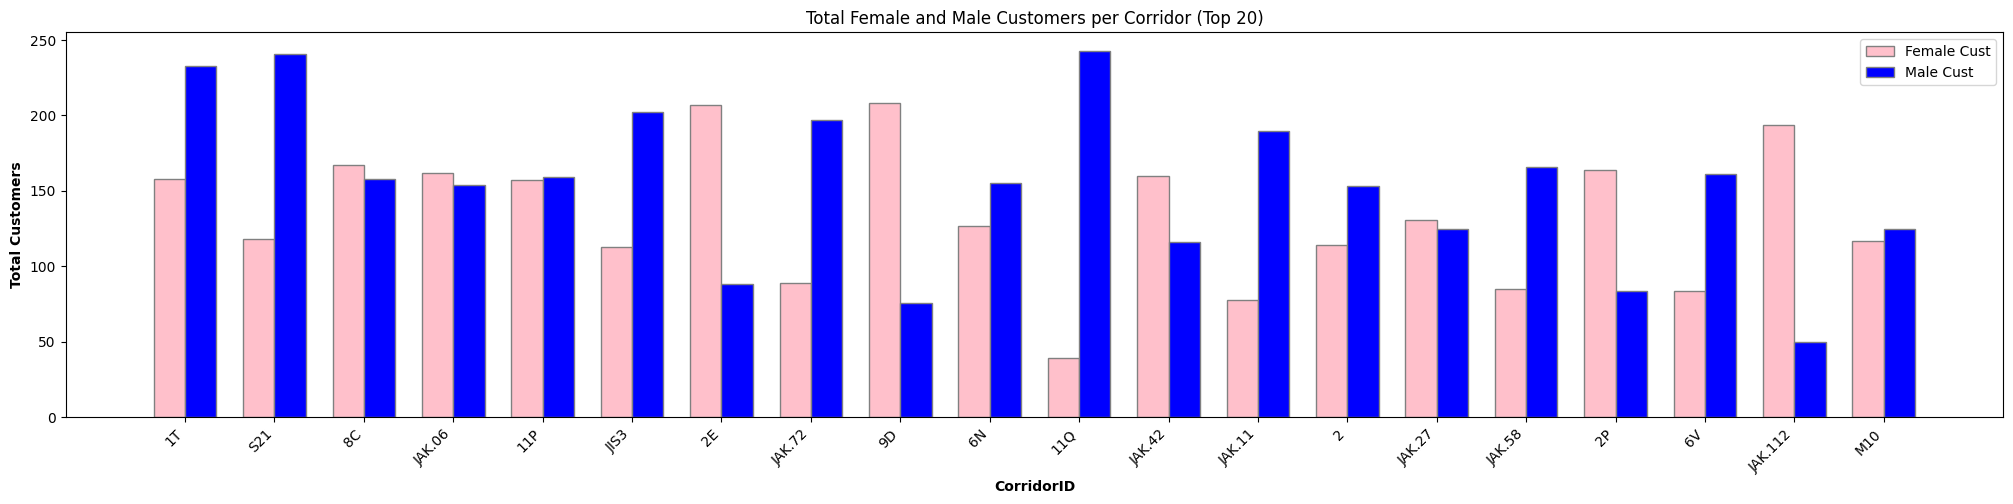

In [119]:
plt.figure(figsize=(25,5))
bar_width = 0.35
r1 = range(len(corrperTransTop20['corridorID']))
r2 = [x + bar_width for x in r1]
plt.bar(r1, corrperTransTop20['Total Female Cust'], color='pink', width=bar_width, edgecolor='grey', label='Female Cust')
plt.bar(r2, corrperTransTop20['Total Male Cust'], color='blue', width=bar_width, edgecolor='grey', label='Male Cust')
plt.xlabel('CorridorID', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(corrperTransTop20['corridorID']))], corrperTransTop20['corridorID'],rotation = 45,ha='right')
plt.ylabel('Total Customers', fontweight='bold')
plt.title('Total Female and Male Customers per Corridor (Top 20)')
plt.legend()
plt.show()

Melalui bar graph diatas, dapat diketahui sebaran penumpang pria dan wanita di 20 kordior terpadat. untuk kedua koridor teratas didominasi oleh penumpang pria daripada wanita. Sementara tiga koridor selanjutnya, penumpang pria dan wanita berjumlah hampir sama pada koridor-koridor tersebut. Penumpang wanita lebih mendominasi di koridor 2E dan JAK.112

## Berdasarkan payCardBirthDate

Karakter penumpang yang dapat diidentifikasi adalah usia penumpang pengguna Transjakarta berdasarkan analisis fitur `payCardBirthDate`. Dari analisis ini dapat menjawab pertanyaan ini:
1. Berapa rata-rata umur penumpang di 20 koridor Transjakarta terpadat

Informasi ini digunakan untuk mengetahui usia dominan penumpang Transjakarta sehingga dapat ditentukan strategi peningkatan pemasukan yang cocok seusai kebutuhan umur penumpang

Sebelum dapat mengidentifikasi usia penumpang, kita buat terlebih dahulu kolom tahun ini dengan menggunakan value 2023 sebagai acuan usia penumpang saat ini. Kemudian kita buat kolom usia dengam mengurangkan tahun 2023 dengan tahun kelahiran penumpang berdasarkan kolom 'payCardBirthDate'

In [141]:
#membuat kolom usia
df['tahunNow'] = 2023
df['age'] = df['tahunNow']-df['payCardBirthDate']
dfweekday = df[(df['isWeekend']==False)]
dfweekday

,transID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,tapInStopsName,tapInTime,payAmount,tapInHour,tapInWeekday,isWeekend,jenisLayanan,tahunNow,age
0,EIIW227B8L34VB,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,Pal Putih,2023-04-03 05:21:44,3500.0,5,0,False,Transjakarta,2023,15
1,LGXO740D2N47GZ,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,Kemenkes 2,2023-04-03 05:42:44,3500.0,5,0,False,Transjakarta,2023,26
2,DJWR385V2U57TO,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,Gg. Kunir II,2023-04-03 05:59:06,3500.0,5,0,False,Transjakarta,2023,31
3,JTUZ800U7C86EH,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Taman Elok 1,2023-04-03 05:44:51,3500.0,5,0,False,Transjakarta,2023,45
4,VMLO535V7F95NJ,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,Sunter Boulevard Barat,2023-04-03 06:17:35,3500.0,6,0,False,Transjakarta,2023,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37894,ZXVG342K6T27GU,brizzi,"Tgk. Dipa Purnawati, S.E.I",F,2012,JAK.39,Kalimalang - Duren Sawit,Sbr. SMPN 252,2023-04-14 11:36:12,0.0,11,4,False,Mikrotrans,2023,11
37895,ZWEC949B8Q87QG,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,Tosari,2023-04-21 18:18:37,3500.0,18,4,False,Transjakarta,2023,19
37896,YHHK837P6Y95GN,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,Garuda Taman Mini,2023-04-18 21:52:31,3500.0,21,1,False,Transjakarta,2023,49
37897,YXPP627N4G95HO,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,Plaza Sentral,2023-04-04 10:29:47,20000.0,10,1,False,Royaltrans,2023,47


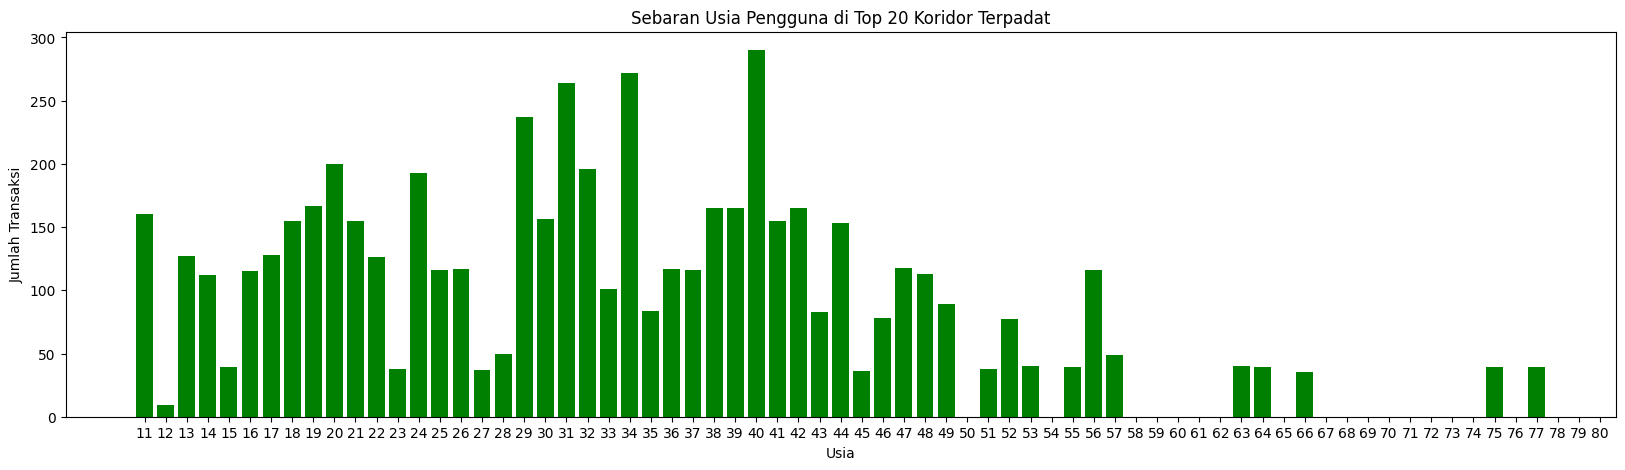

In [153]:
#visualisasikan data tabel diatas
dfRuteUmur =  dfweekday.groupby(['corridorID','age'])[['transID']].count().reset_index()
dfRute = dfweekday.groupby('corridorID')[['transID']].count().sort_values(by='transID',ascending=False).head(20).reset_index()
merge_df = pd.merge(dfRuteUmur,dfRute,on='corridorID',how='inner')
top20rute_byUmur = merge_df.groupby('age')[['transID_x']].sum().reset_index().sort_values(by='transID_x',ascending=False)

# Ubah warna dari histogram
plt.figure(figsize=(20,5))
bars = plt.bar(top20rute_byUmur['age'],top20rute_byUmur['transID_x'],color='green')

plt.title('Sebaran Usia Pengguna di Top 20 Koridor Terpadat')
plt.xlabel('Usia')
plt.xticks(np.arange(11,81, 1))
plt.ylabel('Jumlah Transaksi')
plt.show()

Berdasarkan bargraph diatas bahwa usia yang mendominasi 20 koridor terpadat adalah penumpang yang berusia 29, 31, 34, dan 40. Agar lebih detail untuk analisis dominan usia berapa di setiap koridor, kita bisa menggunakan median sebagai acuan untuk melihat rata-rata usia penumpang, sebab apabila menggunakan perhitungan rata-rata hasilnya tidak akan bulat dan kurang realistis untuk mempresentasikan sebagai umur

In [152]:
#buat variabel baru dengan mengelompokan corridorID berdasarkan banyaknya jumlah transaksi
corrperTransTop20 = dfweekday.groupby('corridorID')[['transID']].count().reset_index()
#diurutkan berdasarkan transID tertinggi
corrperTransTop20 = corrperTransTop20.sort_values(by='transID', ascending=False).head(20)
#buat variabel baru berisi corridor ID dan median dari usia perkoridor
median = dfweekday.groupby('corridorID')[['age']].median().reset_index()
#kedua variabel diatas di merge dengan menyamakan corridorID
medianage = pd.merge(median, corrperTransTop20, on='corridorID')
#tabel diurutkan berdasarkan jumlah transID tertinggi
medianage.sort_values(by='transID', ascending=False)

,corridorID,age,transID
2,1T,30.0,391
19,S21,30.0,359
8,8C,36.0,325
0,11P,40.0,316
10,JAK.06,29.0,316
17,JIS3,34.0,315
4,2E,32.0,295
16,JAK.72,26.0,286
9,9D,37.0,284
6,6N,32.0,282


Berdasarkan tabel diatas dapat dilihat rentang usia penumpang Transjakarta di koridor terpadat berada direntang usia 21-42 tahun. Usia tersebut merupakan usia pekerja yang membuktikan kenapa koridor transjakarta hanya padat di jam-jam sibuk saja

# Kesimpulan dan Rekomendasi

Dari analisis diatas, kesimpulan yang didapatkan adalah sebagai berikut:
* Kepadatan di koridor Transjakarta saat *weekday* terjadi di rentang waktu jam sibuk saja, yaitu jam pergi kantor (05.00-09.00) dan jam pulang kantor (16.00-21.00), sementara di rentang waktu lain jumlah transaksi sangat sedikit (tidak padat) 
* Dari 20 koridor terpadat teratas, terdapat setidaknya enam koridor yang mempunyai jumlah transaksi yang cenderung lebih tinggi daripada koridor lainnya, koridor tersebut antara lain 1T, S21, 8C, 11P, JAK.06, dan JIS 3
* Halte Garuda Taman Mini merupakan halte yang paling padat. Disusul dengan halte BKN, Pejaten, dan BNN LRT yang masing-masing memiliki perbedaan di range 10 transaksi. 


Karakteristik penumpang yang menggunakan Transjakarta adalah sebagai berikut :
* Kartu pembayaran jenis dki adalah jenis kartu pembayaran yang paling banyak digunakan dengan transaksi sebanyak 15880. Kartu yang paling banyak digunakan selanjutnya adalah emoney sebanyak 5762 transaksi, kartu brizzi, flazz, online, bni merupakan kartu terbanyak setelahnya dengan proporsi yang tidak jauh beda antar satu sama lain dengan proporsi dibawah 3000 transaksi
* Berdasarkan Uji Mann-Whitney U perbedaan signifikan dalam jumlah pembayaran antara kedua jenis kelamin. Dengan dominasi sebaran jenis kelamin pria paling mendominasi di dua teratas koridor terpadat (1T, S21). Sementara penumpang wanita lebih mendominasi di koridor 2E dan JAK.112
* Median umur penumpang di koridor terpadat berada di rentang usia 21-42. Dengan dua koridor terpadat teratas yang memiliki median penumpang di usia 30 tahun

**Rekomendasi**

### 1. Promosi dan Program Loyalitas Kepada Penumpang
1. Berdasarkan jam sibuk (05.00-09.00 dan 16.00-21.00) di koridor terpadat seperti 1T, S21, 8C, 11P, JAK.06, dan JIS 3. Dapat dibuat promosi khusus, bisa berupa diskon khusus untuk pengguna kartu DKI yang dominan, atau penawaran bundling tiket.
**Promosi berdasarkan jenis kelamin**
2. Berikan diskon atau penawaran khusus di koridor 1T dan S21 yang didominasi oleh penumpang pria. Kerjasama dengan brand yang menarik bagi pria bisa menjadi pilihan, seperti toko elektronik atau olahraga.
3. Di koridor 2E dan JAK.112, tawarkan diskon atau program loyalitas yang menarik bagi wanita. Kerjasama dengan brand fashion atau kecantikan bisa menjadi opsi.

### 2. Pembukaan Tenant di Halte Padat
1. Membuka tenant makanan dan minuman di 30 halte terpadat terutama di **Halte Garuda Taman Mini:** atau membuka makanan cepat saji karena melihat kepadatan di jam-jam pagi dan malam memungkinkan penumpang membeli makanan untuk sarapan dan makan malam
2. Bekerjasama dengan tenant untuk memberikan promosi makanan dan minuman sehingga menarik pembeli untuk berbelanja di tenant tersebut

### 3. Kerjasama dan Sponsorship
**Kerjasama dengan Perusahaan Pembayaran:**
1. Kerjasama dengan penerbit kartu DKI, emoney, Brizzi, Flazz, Online, dan BNI untuk menawarkan cashback atau poin reward bagi pengguna setia. Ini dapat meningkatkan penggunaan kartu tertentu sekaligus mempromosikan transaksi digital.

**Sponsorship di Halte:**
2. Menjalin kerjasama dengan berbagai brand untuk memasang iklan atau branding di halte yang paling ramai seperti Garuda Taman Mini dan BKN dan pemasangan iklan di armada bus koridor terpadat. Ini akan meningkatkan pemasukan dari iklan.

### 4. Optimalisasi Aplikasi
**Aplikasi Transjakarta:**
1. Gunakan aplikasi untuk mengirim notifikasi promosi khusus berdasarkan waktu dan lokasi. Misalnya, penawaran khusus untuk pengguna yang naik di koridor 1T atau S21 pada jam tertentu.
2. Integrasikan program loyalitas ke dalam aplikasi, di mana penumpang dapat melacak poin dan menukarkannya dengan perjalanan gratis atau diskon.

### 5. Survey dan Feedback
Evaluasi promosi perlu dilakukan setiap waktu sehingga dapat ditemukan hal yang perlu dilakukan improvisasi, untuk itu perlu dilakukan survei berkala untuk memahami kebutuhan penumpang. Setelah survei dilakukan kemudian dilakukan analisis sehingga dapat ditemukan langkah yang tepat untuk strategi pemasaran berikutnya

Dengan implementasi yang terfokus pada data dan kebutuhan spesifik penumpang, Transjakarta dapat meningkatkan pemasukan secara efektif dan efisien.